# ESA 11: Decision Trees
## Example

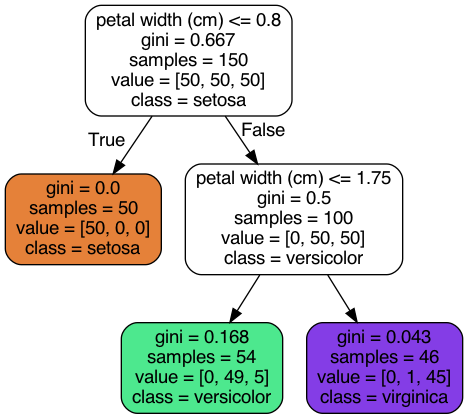

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
import pandas as pd
from IPython.display import Image

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

dot = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

dot

graph = pydotplus.graph_from_dot_data(dot)

Image(graph.create_png())

## Exercise
### Manual calculation

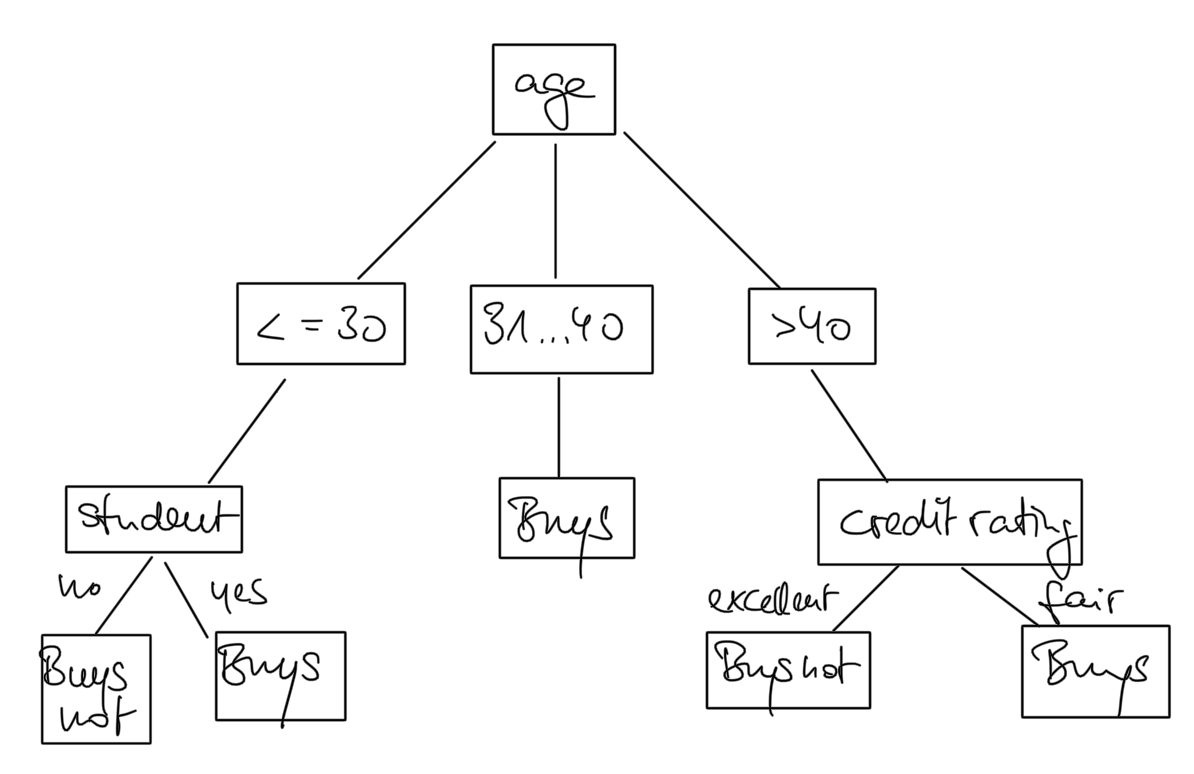

In [25]:
Image(filename='det.png', width=500) 

#### Split by age
20 persons (12 yes/8 no)

`<=30`: 8 (2 yes: 25%)

`31...40`: 6 (6 yes: 100%)

`>40`: 6 (4 yes: 67%)


In [26]:
number_of_persons = 20
persons_in_age_group_1 = 8
persons_in_age_group_2 = 6
persons_in_age_group_3 = 6

# Gini for <=30
gini_for_age_group_1 = (2/persons_in_age_group_1)**2 + (6/persons_in_age_group_1)**2
gini_for_age_group_2 = (6/persons_in_age_group_2)**2
gini_for_age_group_3 = (4/persons_in_age_group_3)**2 + (2/persons_in_age_group_3)**2

gini_age = (persons_in_age_group_1/number_of_persons) * gini_for_age_group_1 + (persons_in_age_group_2/number_of_persons) * gini_for_age_group_2 + (persons_in_age_group_3/number_of_persons) * gini_for_age_group_3
print("The gini coefficient for age is:", gini_age)

The gini coefficient for age is: 0.7166666666666667


In [32]:
persons_in_income_group_1 = 7
persons_in_income_group_2 = 8
persons_in_income_group_3 = 5

gini_for_income_group_1 = (4/persons_in_income_group_1)**2 + (3/persons_in_income_group_1)**2
gini_for_income_group_2 = (5/persons_in_income_group_2)**2 + (3/persons_in_income_group_2)**2
gini_for_income_group_3 = (3/persons_in_income_group_3)**2 + (2/persons_in_income_group_3)**2

gini_income = (persons_in_income_group_1/number_of_persons) * gini_for_income_group_1 + (persons_in_income_group_2/number_of_persons) * gini_for_income_group_2 + (persons_in_income_group_3/number_of_persons) * gini_for_income_group_3
print("The gini coefficient for income groups is:", gini_income)

The gini coefficient for income groups is: 0.5210714285714285


In [33]:
persons_in_credit_group_1 = 10
persons_in_credit_group_2 = 10

gini_for_credit_group_1 = (7/persons_in_credit_group_1)**2 + (3/persons_in_credit_group_1)**2
gini_for_credit_group_2 = (5/persons_in_credit_group_2)**2 + (5/persons_in_credit_group_2)**2

gini_credit = (persons_in_credit_group_1/number_of_persons) * gini_for_credit_group_1 + (persons_in_credit_group_2/number_of_persons) * gini_for_credit_group_2
print("The gini coefficient for credit rating is:", gini_credit)

The gini coefficient for credit rating is: 0.54


In [28]:
persons_in_student_group_1 = 9
persons_in_student_group_2 = 11

gini_for_student_group_1 = (8/persons_in_student_group_1)**2 + (1/persons_in_student_group_1)**2
gini_for_student_group_2 = (4/persons_in_student_group_2)**2 + (7/persons_in_student_group_2)**2

gini_student = (persons_in_student_group_1/number_of_persons) * gini_for_student_group_1 + (persons_in_student_group_2/number_of_persons) * gini_for_student_group_2
print("The gini coefficient for being a student is:", gini_student)

The gini coefficient for being a student is: 0.6565656565656566


The gini coefficient for age is the highest which is why splitting on age first should be preferred.

### Computer-supported learning

In [29]:
df = pd.DataFrame()

df['age'] = ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40', '<=30', '<=30', '<=30', '31...40', '>40' , '31...40']
df['income'] = ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'High']
df['student'] = ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No']
df['credit_rating'] = ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Excellent', 'Fair', 'Excellent', 'Excellent']
df['buys_computer'] = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes']

print(df)

        age  income student credit_rating buys_computer
0      <=30    High      No          Fair            No
1      <=30    High      No     Excellent            No
2   31...40    High      No          Fair           Yes
3       >40  Medium      No          Fair           Yes
4       >40     Low     Yes          Fair           Yes
5       >40     Low     Yes     Excellent            No
6   31...40     Low     Yes     Excellent           Yes
7      <=30  Medium      No          Fair            No
8      <=30     Low     Yes          Fair           Yes
9       >40  Medium     Yes          Fair           Yes
10     <=30  Medium     Yes     Excellent           Yes
11  31...40  Medium      No     Excellent           Yes
12  31...40    High     Yes          Fair           Yes
13      >40  Medium      No     Excellent            No
14     <=30  Medium      No     Excellent            No
15     <=30     Low      No          Fair            No
16     <=30     Low      No     Excellent       

In [30]:
data = pd.get_dummies(df[['age', 'income', 'student', 'credit_rating']])
data

,age_31...40,age_<=30,age_>40,income_High,income_Low,income_Medium,student_No,student_Yes,credit_rating_Excellent,credit_rating_Fair
0,0,1,0,1,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,1,0,0,1
4,0,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,0,1,1,0
6,1,0,0,0,1,0,0,1,1,0
7,0,1,0,0,0,1,1,0,0,1
8,0,1,0,0,1,0,0,1,0,1
9,0,0,1,0,0,1,0,1,0,1


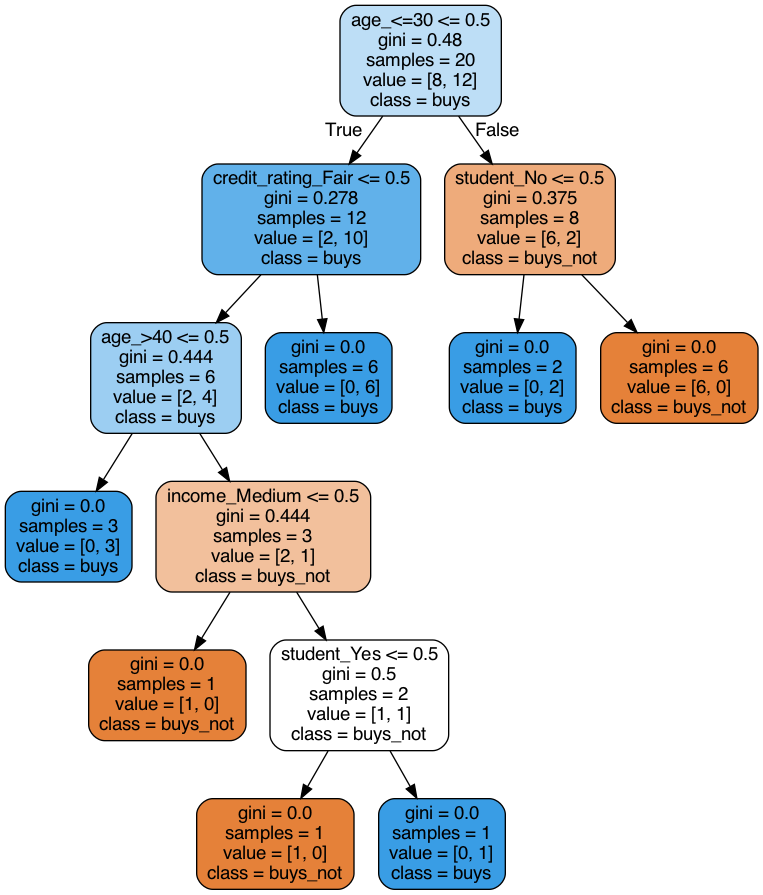

In [31]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier_train = decision_tree_classifier.fit(data, df['buys_computer'])

dot = export_graphviz(
    decision_tree_classifier,
    out_file=None,
    feature_names=list(data.columns.values),
    class_names=["buys_not", "buys"],
    rounded=True,
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())